In [1]:
!pip install libsvm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp39-cp39-linux_x86_64.whl size=253859 sha256=72344e0c94a0c4c5871a655e8c0a82a9129983d6a4d2fde0cdae15fe3d214c91
  Stored in directory: /root/.cache/pip/wheels/c1/ce/25/0d50035499973fcbcc407fcb897d53e47b6eb4601308789aa6
Successfully built libsvm


In [2]:
import torch
import numpy as np
import matplotlib. pyplot as plt
import torch.nn as nn
import math 
from libsvm.svmutil import *
from scipy.sparse import csr_matrix
from libsvm import svmutil 


In [3]:
# tensor = torch.tensor([[1,2],[3,4],[5,6]])
# # tensor.shape
# perm = torch.randperm(3)
# print(tensor.shape[0])
# print(perm)
# shuffled_tensor = tensor.index_select(0, perm)
# print(shuffled_tensor)

In [4]:
torch.manual_seed(35)

# y = 2x +ε
def generate_data_points(max, min, num_points):
  x = torch.linspace(max, min, num_points)
  epsilon = torch.randn(num_points)
  y = 2 * x + epsilon
  
  return x,y

In [5]:
x, y = generate_data_points(-100, 100, 500)

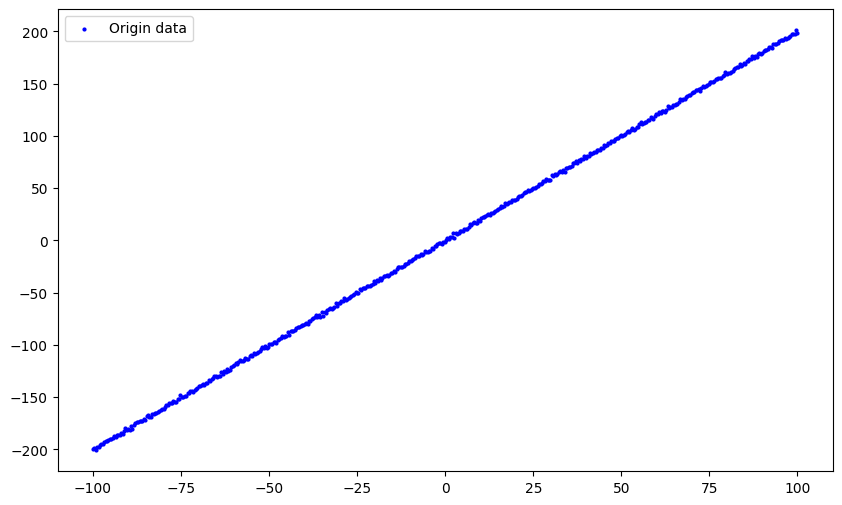

In [6]:
# Plots training data, test data and compares predictions.

# def plot_predictions(origin_data, origin_labels, predicted_value, degrees, predictions):
  
plt.figure(figsize=(10, 6))
# plt.title("Degrees: " + str(degrees))
  # Plot training data in blue
plt.scatter(x, y, c="b", s=4, label="Origin data")
 
  
  # plt.plot(origin_data, predicted_value, c="orange", label="Prediction")

  # if predictions is not None:
  #   # Plot the predictions in red (predictions were made on the test data)
  #   plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
plt.legend(prop={"size": 10});

In [7]:
print(x.shape)
print(y.shape)

torch.Size([500])
torch.Size([500])


In [8]:
x = x.unsqueeze(1)
y = y.unsqueeze(1)

In [9]:
x_y_pair = torch.cat((x, y), dim=1)

In [10]:
# tensor = torch.tensor([[1,2],[3,4],[5,6]])
# tensor.shape
perm = torch.randperm(x_y_pair.shape[0])
print(perm)
x_y_pair = x_y_pair.index_select(0, perm)
print(x_y_pair.shape)

tensor([341, 431, 279, 392, 158, 376, 262, 330,   7,  84,  72, 165, 322, 253,
        140, 118, 168, 394, 370, 196,  45, 362, 436, 499, 199, 102,  22,  86,
        265, 479, 349, 248,  77, 114, 150, 433, 484, 109, 393, 391,  90,  30,
        375,  42, 492, 268, 301,  67, 211, 454, 428,  60, 382, 181, 497, 396,
         80,  44, 410, 343, 210, 427, 299, 198,  78, 325, 306, 439, 415, 310,
        245, 212,  74,  15, 105,  65, 442, 378, 191, 125, 421, 189,  66, 185,
         92, 250, 345, 288, 452, 239, 329, 350, 477, 187, 161, 289, 256, 389,
         55, 240, 116, 154, 357,  11, 437, 138, 402,   9, 144, 244, 440, 356,
        403, 280,  87, 169,  94, 399, 360, 178, 148,  27, 143, 405, 263, 476,
        234, 338,  12, 180,  38, 342, 355, 311, 120, 173,   0, 218, 384,  46,
         83, 284, 471, 407, 231, 164, 296,   1,  96, 236, 254, 128, 315,  18,
        337,  16,  24, 488, 409, 117, 200, 273, 422, 230, 259, 397,  70, 146,
         88,  58, 340, 367, 491, 112, 214, 314,  28, 364,  81, 4

In [11]:
print(x_y_pair.shape)

torch.Size([500, 2])


In [12]:
x_y_pair[:400].shape

torch.Size([400, 2])

In [13]:
def get_labels(data):
  labels = []
  for data_points in data:
    x = data_points[0]
    y = data_points[1]
    # epsilon = y - 2 * x
    W = torch.tensor([2, -1, 0.0])
    X = torch.tensor([x, y, 1])
    label = torch.sign(torch.dot(W, X)).item()
    labels.append(label)
  
  return labels

In [14]:
# 80% train, 20% test
# print(int(len(x_y_pair) * 0.8))
# cut = int(len(x_y_pair) * 0.8)
# train = x_y_pair[:cut].numpy()
# train_label = get_labels(x_y_pair[:cut])
# test = x_y_pair[cut:].numpy()
# test_label = get_labels(x_y_pair[cut:])


In [15]:
def generate_train_test_data_amd_label(data, split_rate):
  cut = int(len(data) * split_rate)
  train = data[:cut].numpy()
  train_label = get_labels(data[:cut])
  test = data[cut:].numpy()
  test_label = get_labels(data[cut:])

  return train, train_label, test, test_label

In [16]:
train, train_label, test, test_label = generate_train_test_data_amd_label(x_y_pair, 0.8)

In [17]:
# svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.00390625 -g 0.000244140625 -w1 1 -w-1 6 -v 5')
# svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.00390625 -g 0.000244140625 -w1 1 -w-1 6')
# p_labels, p_acc, p_vals = svmutil.svm_predict(test_label, test, svm_model)

In [18]:
# c = 2 to the power of -5
# gamma = 2 to the power of -15
svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.000030517578125 -w1 1 -w-1 1 -v 5')
svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.000030517578125 -w1 1 -w-1 1')
p_labels, p_acc, p_vals = svmutil.svm_predict(test_label, test, svm_model)

Cross Validation Accuracy = 83%
Accuracy = 84% (84/100) (classification)


In [19]:
# c = 2 to the power of -5
# gamma = 2 to the power of -13
svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.0001220703125 -w1 1 -w-1 1 -v 5')
svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.0001220703125 -w1 1 -w-1 1')
p_labels, p_acc, p_vals = svmutil.svm_predict(test_label, test, svm_model)

Cross Validation Accuracy = 88.5%
Accuracy = 89% (89/100) (classification)


In [20]:
# c = 2 to the power of -5
# gamma = 2 to the power of -11
svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.00048828125 -w1 1 -w-1 1 -v 5')
svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.00048828125 -w1 1 -w-1 1')
p_labels, p_acc, p_vals = svmutil.svm_predict(test_label, test, svm_model)

Cross Validation Accuracy = 89%
Accuracy = 90% (90/100) (classification)


**Scaling**

scale to range [-1; +1]

In [21]:
def scaling(data, max, min):
  x_tensor = torch.tensor(data[:,0]).clone().detach()
  # y_tensor = torch.tensor(data[:,1])
  # Linearly scaling x train to the range [-1; +1].

  x_current_min = torch.min(x_tensor)
  x_current_max = torch.max(x_tensor)

  x_new_min = min
  x_new_max = max

  x_scaling_factor = (x_new_max - x_new_min) / (x_current_max - x_current_min)

  x_shifted_tensor = x_tensor - x_current_min

  x_scaled_tensor = x_shifted_tensor * x_scaling_factor

  x_scale_data = x_scaled_tensor + x_new_min

  epsilon = data[:,1] - 2 * data[:,0]
  y_scale_data = 2 * x_scale_data + epsilon

  return  x_scale_data, y_scale_data

In [22]:

x_train_scale_data, y_train_scale_data = scaling(train, 1, -1)
x_train_scale_data = x_train_scale_data .unsqueeze(1)
y_train_scale_data = y_train_scale_data.unsqueeze(1)


x_test_scale_data, y_test_scale_data = scaling(test, 1, -1)
x_test_scale_data = x_test_scale_data .unsqueeze(1)
y_test_scale_data = y_test_scale_data.unsqueeze(1)

train = torch.cat((x_train_scale_data , y_train_scale_data), dim=1).numpy()
test = torch.cat((x_test_scale_data, y_test_scale_data), dim=1).numpy()

In [23]:
# # c = 2 to the power of -5
# # gamma = 2 to the power of -15
# svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.000030517578125 -w1 1 -w-1 1 -v 5')
# svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.000030517578125 -w1 1 -w-1 1')
# p_labels, p_acc, p_vals = svmutil.svm_predict(test_label, test, svm_model)

In [24]:
# # c = 2 to the power of -5
# # gamma = 2 to the power of -13
# svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.0001220703125 -w1 1 -w-1 1 -v 5')
# svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.0001220703125 -w1 1 -w-1 1')
# p_labels, p_acc, p_vals = svmutil.svm_predict(test_label, test, svm_model)

In [25]:
# c = 2 to the power of -5
# gamma = 2 to the power of -11
svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.00048828125 -w1 1 -w-1 1 -v 5')
svm_model = svmutil.svm_train(train_label, train, '-s 1 -t 2 -d 2 -c 0.03125 -g 0.00048828125 -w1 1 -w-1 1')
p_labels, p_acc, p_vals = svmutil.svm_predict(test_label, test, svm_model)

Cross Validation Accuracy = 94.75%
Accuracy = 95% (95/100) (classification)
